In [1]:
pip install .

Processing c:\users\kashi\qksa\qthought
  Created wheel for qthought: filename=qthought-0.0.1-py3-none-any.whl size=30194 sha256=196ccf55b4664888b03a29f0e2dffa5297ad5f3461e07b4187b20369f05615ee
  Stored in directory: C:\Users\kashi\AppData\Local\Temp\pip-ephem-wheel-cache-68mqwqul\wheels\e7\ad\33\ebb1ce2af91b0a47eebb58d95b89d54d0adc4139329b1de38d
Successfully built qthought
  Attempting uninstall: qthought
Note: you may need to restart the kernel to use updated packages.    Found existing installation: qthought 0.0.1
    Uninstalling qthought-0.0.1:
      Successfully uninstalled qthought-0.0.1



In [2]:
!pip install qiskit
import qthought.utils as ut
from qthought.protocol import Protocol, ProtocolStep
from qthought.quantumsystem import QuantumSystem
from qthought.agents import Agent
from qthought.interpretations.copenhagen_theory import *
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister

# 1. Define Protocol

###### The setting consists of two agents: Alice and Bob. Each experimenter is equipped with a memory qubit. Additionally, there is another system - qubit Ancilla(C). The initial state of the C is $ \frac{1}{\sqrt[2]{2}} \ $ (|0$\rangle$C + |1$\rangle$C). The initial state of the relevant subsystems of the agents' memories is |0$\rangle$A and |0$\rangle$B.

# 2. Define Protocol Steps

##### t = 1. Alice measures system C in basis {|0$\rangle$C, |1$\rangle$C}, and records the result in her memory A.
##### t = 2. Bob measures system C in basis {|0$\rangle$C, |1$\rangle$C}, and records the result in his memory B.
##### t = 3. Alice and Bob reason about each other's outcomes.

In [3]:
from qiskit import assemble, Aer
from qiskit.visualization import plot_histogram
qr = QuantumRegister(1, 'c')
memory = ClassicalRegister(2)
qc = QuantumCircuit(qr,memory)
def action1():
    qc.h(qr)
    
step1 = ProtocolStep(domain={'Qubit': 'c'},
                     descr = 'Prepare Qubit c by applying H ',
                     time  = 0,
                     action = action1)

In [4]:
def action2():
    qc.measure(qr,memory[0])
    
step2 = ProtocolStep(domain={'Qubit': 'c',
                             'AgentMemory(1)': 'Alice'},
                     descr = 'Alice observes c',
                     time  = 1,
                     action = action2)

In [5]:
def action3():
    qc.measure(qr,memory[1])
    
step3 = ProtocolStep(domain={'Qubit': 'c',
                             'AgentMemory(1)': 'Bob'},
                     descr = 'Bob observes c',
                     time  = 2,
                     action = action3)

In [6]:
p = Protocol()
p = step1 + step2 + step3
p

In [7]:
action1()
action2()
action3()

In [12]:
qc.save_statevector()
qobj = assemble(qc) 
state = Aer.get_backend('aer_simulator').run(qobj).result().get_statevector()
state

array([0.+0.j, 1.+0.j])

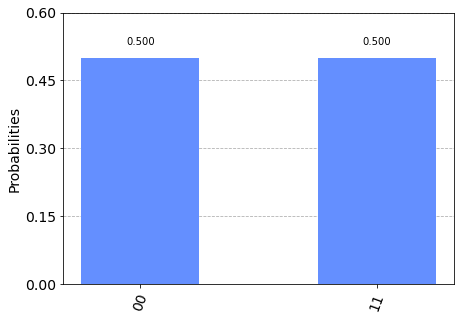

In [20]:
qobj = assemble(qc) 
counts = Aer.get_backend('aer_simulator').run(qobj).result().get_counts() 
plot_histogram(counts)